# Homework 1, Problem 3: Differentiation

In [1]:
def first_order_forward_difference(func, x, step):
    return ( func(x + step) - func(x) ) / step
def second_order_center_difference(func, x, step):
    return ( (1/2)*func(x + step) - (1/2)*func(x - step) ) / step
def fourth_order_center_difference(func, x, step):
    return ( (-1/12)*func(x + 2*step) + (2/3)*func(x + step) + (-2/3)*func(x - step) + (1/12)*func(x - 2*step)) / step

import numpy as np
def err_sinpi4(method, step):
    approx = method(np.sin, np.pi/4, step)
    exact = np.cos(np.pi/4)
    return abs(approx - exact) / exact

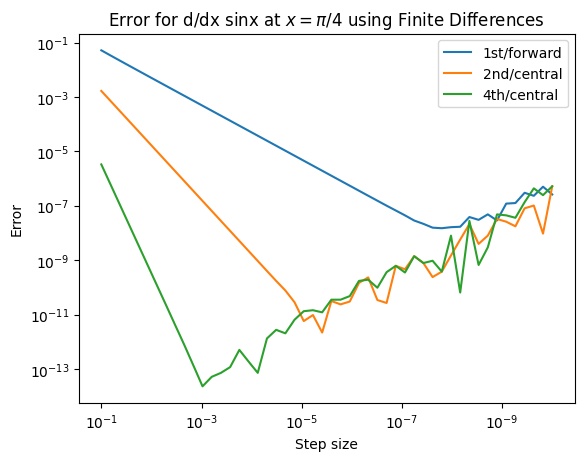

In [2]:
x = list(np.logspace(-10, -1, base=10))
y = {
    "1st/forward": [err_sinpi4(first_order_forward_difference, s) for s in x],
    "2nd/central": [err_sinpi4(second_order_center_difference, s) for s in x],
    "4th/central": [err_sinpi4(fourth_order_center_difference, s) for s in x]
}

import matplotlib.pyplot as plt
for label, ys in y.items():
    plt.plot(x, ys, label=label)

ax = plt.gca()
ax.invert_xaxis()

plt.title(r"Error for d/dx sinx at $x=\pi/4$ using Finite Differences")
plt.xlabel("Step size")
plt.ylabel("Error")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

Each method decreases error with smaller step sizes, until it reaches a point where machine precision errors dominate and small step sizes no longer benefit. Interestingly, after this point, the error increases with step size. Each better method decreases the error out of the gate as compared to its lower order counterparts, reaches a lower minimum error, and has a larger optimal step size.